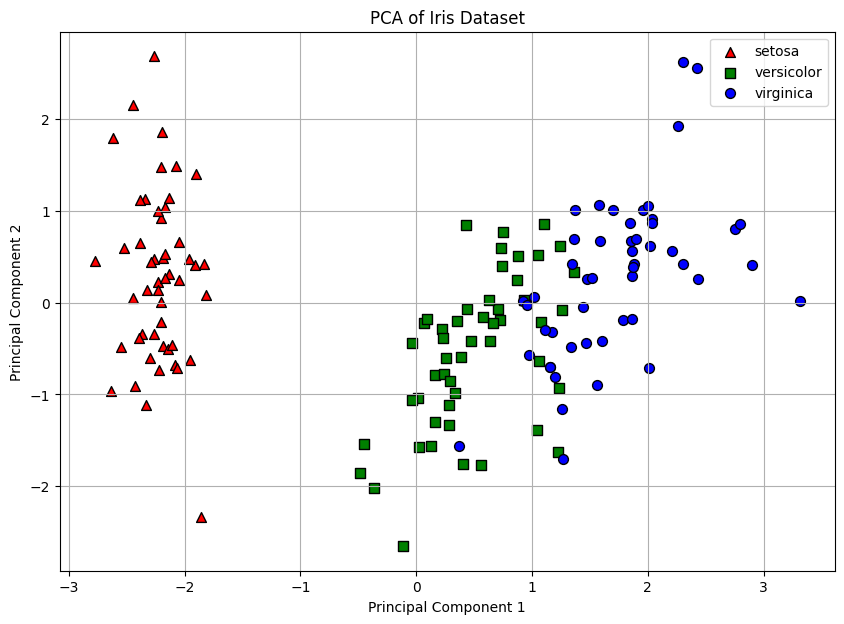

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a dos dimensiones
principal_components = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = target

# Visualización
colors = ['red', 'green', 'blue']
target_names = data.target_names
markers = ['^', 's', 'o']

plt.figure(figsize=(10, 7))
for color, target, target_name, marker in zip(colors, [0, 1, 2], target_names, markers):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, s=50,
                label=target_name, marker=marker, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Cargar el dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA para reducir a tres componentes
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['species'] = data.target_names[target]

# Crear la visualización interactiva 3D con Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    color='species', symbol='species',
                    labels={'species': 'Species'},
                    title="3D PCA of Iris Dataset")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

